# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [12]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


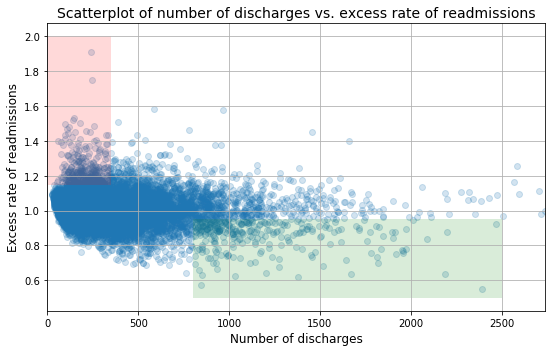

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
# Your turn

### A. Do you agree with the above analysis and recommendations? Why or why not?

I can't tell if I agree or not but I can tell that the above-mentioned implication of EDA is not enough to come up with such an idea. I mean I wouldn't be confident about the conclusion that is reported above. I would definitely choose to conduct further analysis on the "B.Statistics" part of the preliminary report. The above-mentioned report assumes that there is a significant difference between two group of hospitals by capacity.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

##### 1. Setup an appropriate hypothesis test.

**Null Hypothesis:** There is same means of Excess Readmission Ratios of hospitals with discharges <=100 and >=1000. </p> Mean(discharges<=100) = Mean(discharges>=1000)


**Alternative Hypothesis:** There is a significant difference between the means of Excess Readmission Ratios of hospitals with discharges <=100 and >=1000. 
Mean(discharges<=100) != Mean(discharges>=1000) 

##### 2. Compute and report the observed significance value (or p-value).

In [15]:
Hospital=clean_hospital_read_df[~(clean_hospital_read_df['Number of Discharges'] == 0)]

In [23]:
Small_hosp=Hospital[Hospital['Number of Discharges']<=100]
Large_hosp=Hospital[Hospital['Number of Discharges']>=1000]
MinorExcess=Small_hosp['Excess Readmission Ratio']
MajorExcess=Large_hosp['Excess Readmission Ratio']

In [17]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [20]:
diff_means = diff_of_means(MinorExcess,MajorExcess)

# Draw 10000 permutation replicates
perm_replicates=draw_perm_reps(MinorExcess, MajorExcess, diff_of_means, size=10000)

# p-value
p = np.sum(perm_replicates >= diff_means) / float(len(perm_replicates))
print('Empirical difference in means = {}'.format(diff_means))
print('p-value ={}'.format(p))

Empirical difference in means = 0.04375412196548889
p-value =0.0


###### Other Method:

In [21]:
import scipy.stats as stat

results = stat.ttest_ind(MinorExcess,MajorExcess,equal_var=False)
print("Test statistic is equal to : {0}  p-value equal to: {1}".format(results[0],results[1]))

Test statistic is equal to : 7.533013522095164  p-value equal to: 2.0604659724727482e-13


##### 3. Report statistical significance for α = .01

The p-value is extremely low, therefore we should reject the null hypothesis that there is no significant difference between the two groups of hospitals with number of discharges < 100 and those > 1000.

##### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significance refers to the unlikelihood that mean differences observed in the sample have occurred due to sampling error. Given a large enough sample, despite seemingly insignificant population differences, one might still find statistical significance.

Practical significance looks at whether the difference is large enough to be of value in a practical sense.

Significance Level: Is denoted by the Greek letter alpha (α). If the P value we calculate is as small or smaller than α, we say the data is statistically significant at level α.

Practical significance is not the same as statistical significance. ● A general problem with traditional statistics is that if you take large enough samples, almost any difference or any correlation will be significant. ● Due to this problem, many editors and publishers are requiring authors to include some information surrounding the practical significance of their findings. ● Significant study results vary based on context.

In this problem, statistical and practical significance differ. Since the p-value is lower than alpha, we can say that the data is statistically significant at level Alpha.
However, practical significance here is related to effect size. Here it seems from the EDA that there is no practical significance.

##### 5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

In the plot above we can see the relationship of two variables and can get a general understanding of density by area. But we can not get any clue for the median or IQR. We can not observe the two different groups. Distribution is not clear as well. I will use boxplot to see the comparison between two groups.

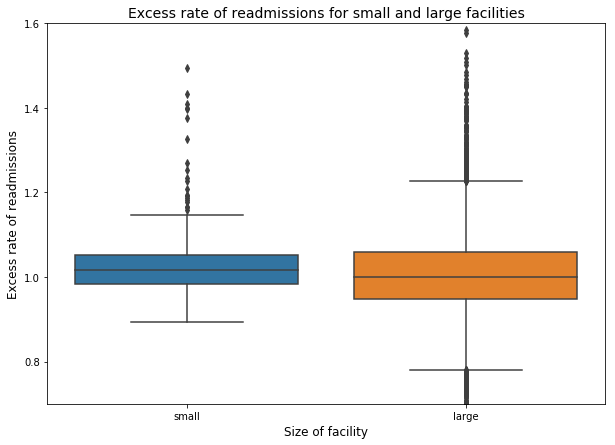

In [35]:
import seaborn as sns

_ = plt.figure(figsize = (10,7))
_ = sns.boxplot(x=['small' if discharges<=100 else 'large' for discharges in Hospital['Number of Discharges']], 
                y='Excess Readmission Ratio', data = Hospital)
_ = plt.ylim([0.7, 1.6])
_ = plt.xlabel('Size of facility', fontsize=12)
_ = plt.ylabel('Excess rate of readmissions', fontsize=12)
_ = plt.title('Excess rate of readmissions for small and large facilities', fontsize=14)
plt.show()

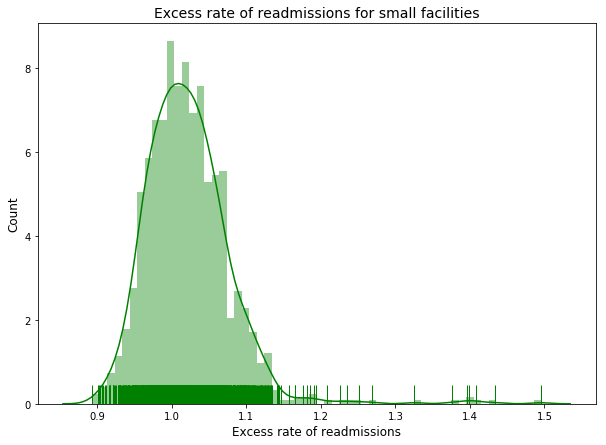

In [41]:
_ = plt.figure(figsize = (10,7))
sns.distplot(MinorExcess, bins=60, rug='True', color = 'g', norm_hist = True)
_ = plt.xlabel('Excess rate of readmissions', fontsize=12)
_ = plt.ylabel('Count', fontsize=12)
_ = plt.title('Excess rate of readmissions for small facilities', fontsize=14)
plt.show()

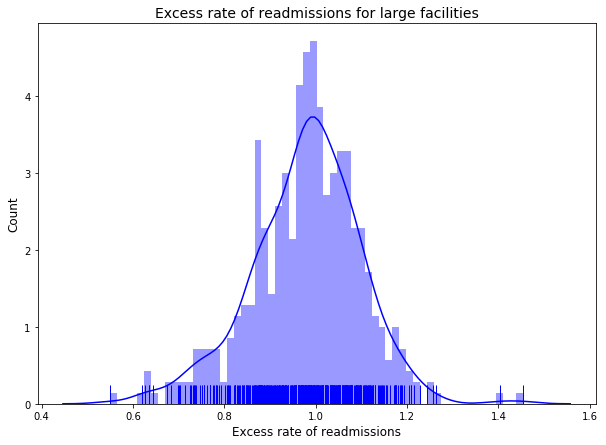

In [42]:
_ = plt.figure(figsize = (10,7))
sns.distplot(MajorExcess, bins=60, rug='True', color = 'b', norm_hist = True)
_ = plt.xlabel('Excess rate of readmissions', fontsize=12)
_ = plt.ylabel('Count', fontsize=12)
_ = plt.title('Excess rate of readmissions for large facilities', fontsize=14)
plt.show()